In [1]:
import utilsExperimentos
import numpy as np
import matplotlib.pyplot as plt

In [26]:
instanciasMin = 100
instanciasMax = 20000
instanciasCantidades = 20
cantidadExperimentos = 1000

m1AccPositive=0.5
m1AccNegative=0.5
m2AccPositive=0.5
m2AccNegative=0.5
tipoFusionador='or'
correlacionPositive=0.95
correlacionNegative=-0.95


resultadosEstimaciones = utilsExperimentos.correrEstimaciones(cantidadElementosTestMin=instanciasMin, cantidadElementosTestMax=instanciasMax, cantidadElementosTestCantidad=instanciasCantidades, m1AccPositive=m1AccPositive, m1AccNegative=m1AccNegative, m2AccPositive=m2AccPositive, m2AccNegative=m2AccNegative, correlacionPositive=correlacionPositive, correlacionNegative=correlacionNegative, tipoFusionador=tipoFusionador)
resultadosTest = utilsExperimentos.correrExperimentos(cantidadExperimentos=cantidadExperimentos, cantidadElementosTestMin=instanciasMin, cantidadElementosTestMax=instanciasMax, cantidadElementosTestCantidad=instanciasCantidades, m1AccPositive=m1AccPositive, m1AccNegative=m1AccNegative, m2AccPositive=m2AccPositive, m2AccNegative=m2AccNegative, correlacionPositive=correlacionPositive, correlacionNegative=correlacionNegative, tipoFusionador=tipoFusionador)

[>                              ] 0/1000 (0.0%)

h:\Gian\Desktop\MATERIAS\TESIS\Codigo\costos\experimentos\fusionador.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return  [0, probabilidadesNegative[1]/(probabilidadesNegative[1]+probabilidadesNegative[3]), probabilidadesPositive[0]/(probabilidadesPositive[0]+probabilidadesPositive[2]), 1]


[==============================>] 1000/1000 (100.0%)


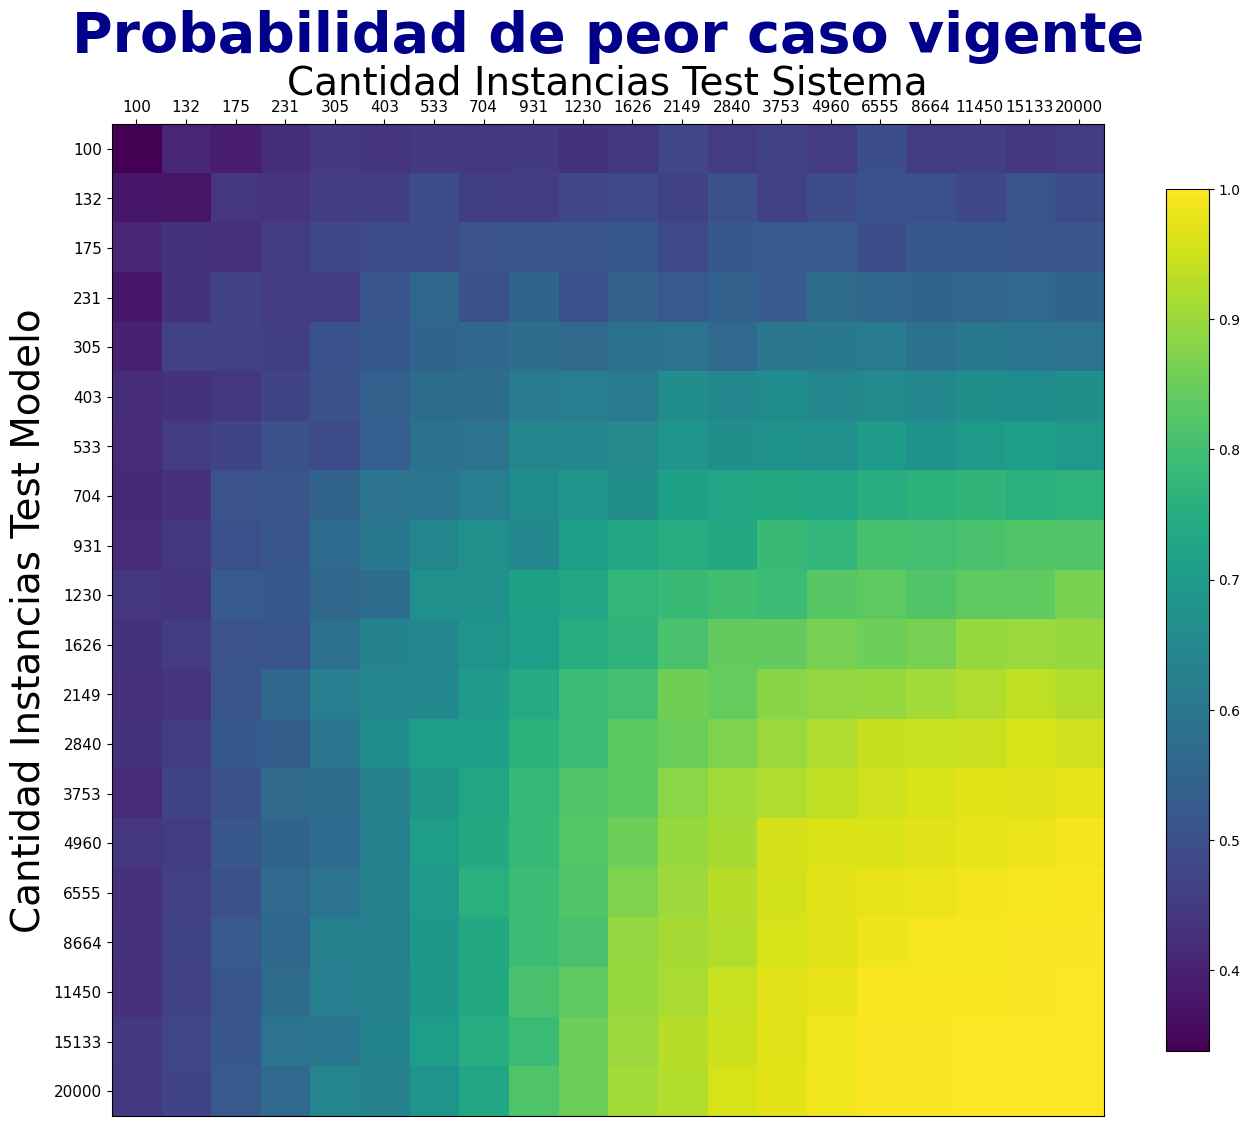

In [35]:
# probabilidad de peor caso peor que el resultado
probabilidadesPeorCasoFallido = (resultadosTest[:,:,0,:] > resultadosTest[:,:,1,:]).mean(2)

fig, ax = plt.subplots(figsize=(instanciasCantidades*8//10,instanciasCantidades*8//10))

im = ax.imshow(probabilidadesPeorCasoFallido, cmap='viridis')

ax.set_xticks(list(range(instanciasCantidades)), np.logspace(np.log10(instanciasMin), np.log10(instanciasMax), instanciasCantidades).round().astype(int), fontsize=11)
ax.set_yticks(list(range(instanciasCantidades)), np.logspace(np.log10(instanciasMin), np.log10(instanciasMax), instanciasCantidades).round().astype(int), fontsize=11)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlabel("Cantidad Instancias Test Sistema", fontsize=instanciasCantidades*14//10)
ax.set_ylabel("Cantidad Instancias Test Modelo", fontsize=instanciasCantidades*14//10)
ax.tick_params(bottom=False, labelbottom=False)

# TEXTO EN LOS CUADRADOS
#
# for i in range(probabilidadesPeorCasoFallido.shape[0]):
#     for j in range(probabilidadesPeorCasoFallido.shape[1]):
#         text = ax.text(j, i, f'{probabilidadesPeorCasoFallido[i, j]:.2f}', ha='center', va='center', color='red', fontsize=12)

plt.colorbar(im, ax=ax, shrink=0.7)
plt.title('Probabilidad de peor caso vigente', fontsize=instanciasCantidades*20//10, color='darkblue', fontweight='bold')
plt.show()

In [24]:
resultadosTestRandom = utilsExperimentos.correrExperimentosModeloRandom(cantidadExperimentos = 100000, cantidadElementosTest = 10000)

[==============================>] 100000/100000 (100.0%)


9984.82577 11649.60841 0.8493895565077297


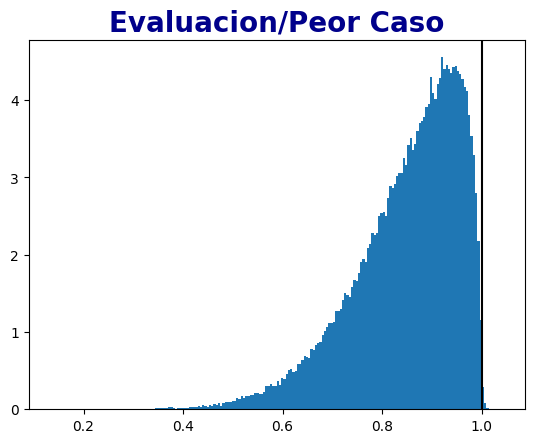

In [34]:
proporcionesEvaluacionSobrePeorCaso = resultadosTestRandom[1] / resultadosTestRandom[0]

print(resultadosTestRandom[1].mean(), resultadosTestRandom[0].mean(), proporcionesEvaluacionSobrePeorCaso.mean())

plt.hist(proporcionesEvaluacionSobrePeorCaso, bins=200, density=True)
plt.axvline(1, color='black', linestyle='-', linewidth=1.5, label=f'Mean: {1:.2f}')
plt.title("Evaluacion/Peor Caso", color='darkblue', fontsize=20, fontweight='bold')
plt.show()